# Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Data processing

In [2]:
df = pd.read_csv("ign.csv")
df.isnull().sum()

Unnamed: 0         0
score_phrase       0
title              0
url                0
platform           0
score              0
genre             36
editors_choice     0
release_year       0
release_month      0
release_day        0
dtype: int64

In [17]:
df["genre"].fillna("Unknown", inplace=True)
df["genre"].isnull().sum()

0

# Exploratory Data Analysis

## Distribution of Game Scores:

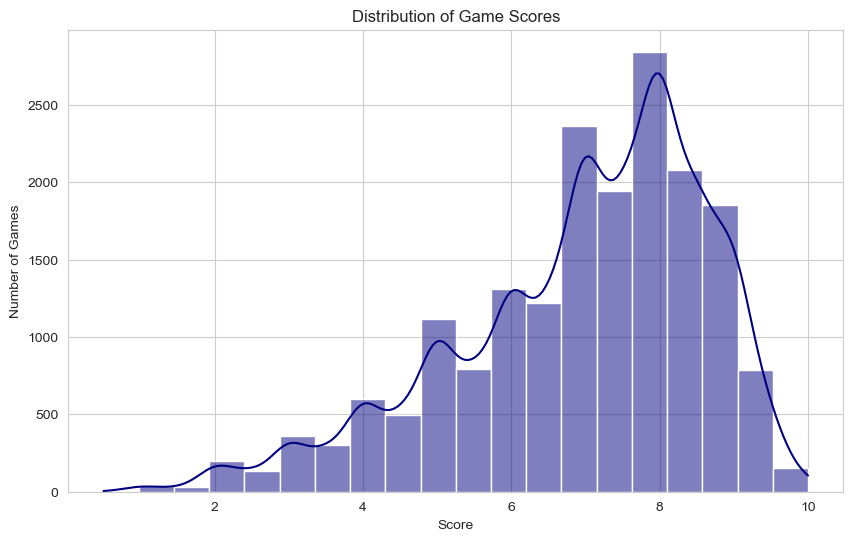

In [18]:
# Plot the distribution of game scores
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df["score"], bins=20, kde=True, color="navy")
plt.title("Distribution of Game Scores")
plt.xlabel("Score")
plt.ylabel("Number of Games")
plt.show()

- The scores are somewhat normally distributed, with a slight skew towards higher scores.
- A large number of games have scores between 6 and 8, with the peak around 7 to 7.5.
- There are fewer games with extremely low or high scores (below 4 or above 9).

## Number of Games Over Time

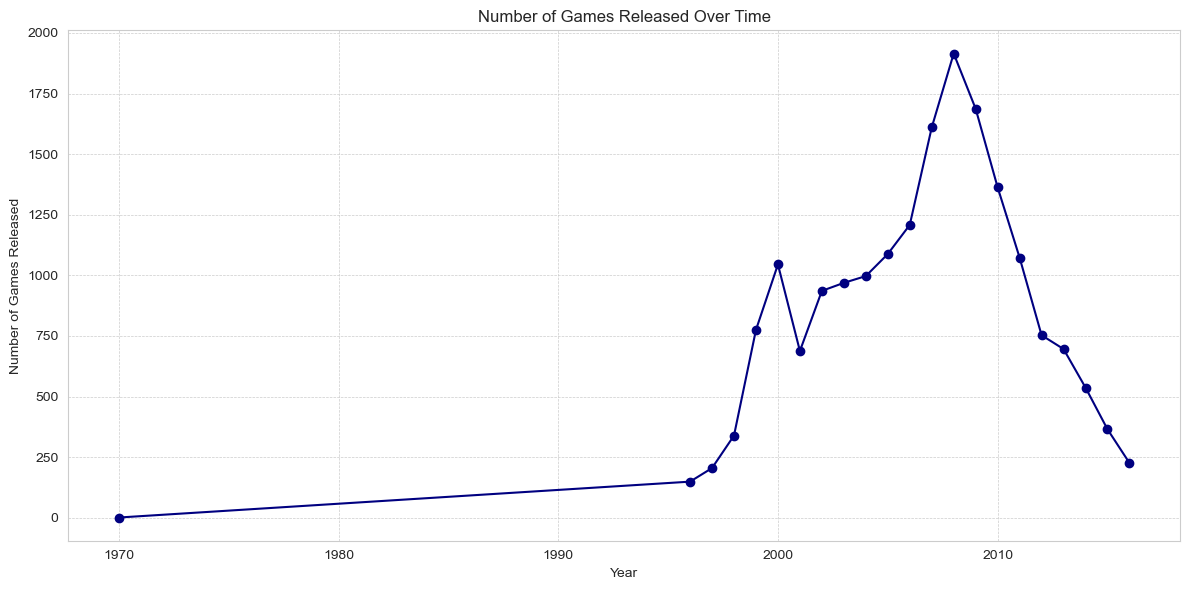

In [5]:
# Group the data by release year and count the number of games released each year
games_per_year = df.groupby("release_year").size()

# Plot the number of games released over time
plt.figure(figsize=(12, 6))
games_per_year.plot(color="navy", marker="o")
plt.title("Number of Games Released Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

- There are a noticeable increase in the number of games released from the late 1990s, peaking around 2008-2009.
- After the peak, there"s a decline in the number of games released annually, but it stabilizes around the mid-2010s.

## Trend in Game score overtime

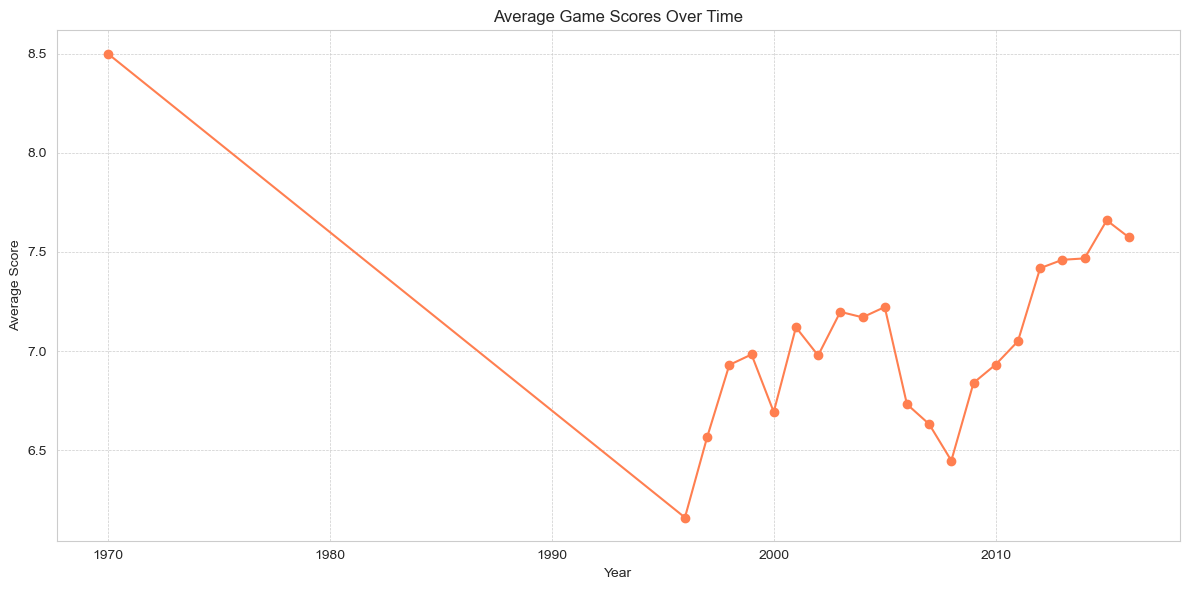

In [6]:
# Group the data by release year and calculate the average score for each year
average_score_per_year = df.groupby("release_year")["score"].mean()

# Plot the average game scores over time
plt.figure(figsize=(12, 6))
average_score_per_year.plot(color="coral", marker="o")
plt.title("Average Game Scores Over Time")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

- The average scores were relatively consistent during the early to mid-1990s.
- There was a slight upward trend from the late 1990s to the mid-2000s.
- From the mid-2000s onward, the average scores seem to stabilize, hovering around the 7 mark.

## Most Popular Genres

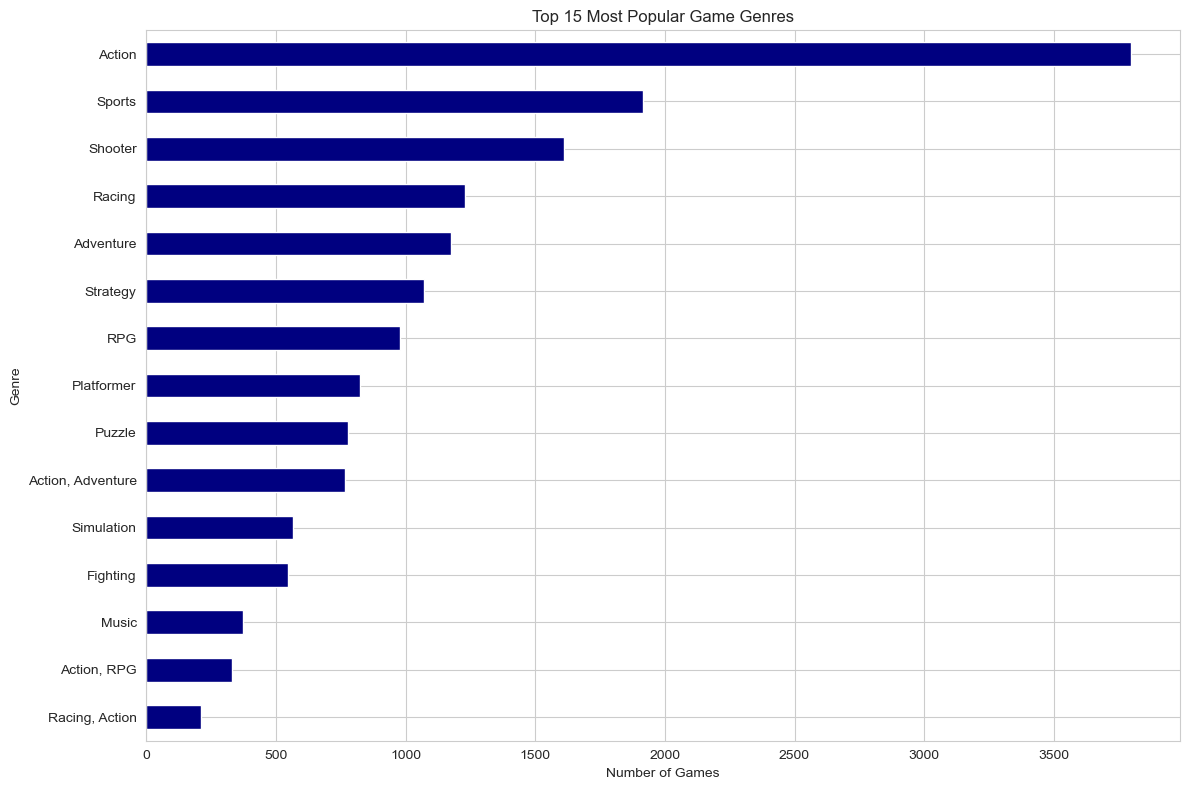

In [7]:
# Count the number of games in each genre
genre_counts = df["genre"].value_counts()

# Plot the top 15 most popular genres
plt.figure(figsize=(12, 8))
genre_counts.head(15).plot(kind="barh", color="navy")
plt.title("Top 15 Most Popular Game Genres")
plt.xlabel("Number of Games")
plt.ylabel("Genre")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


- The "Action" genre stands out as the most popular, with the highest number of games.
- Sports, Shooter, and Racing also have a significant number of games making them some of the more popular categories.

##  Platform Distribution.

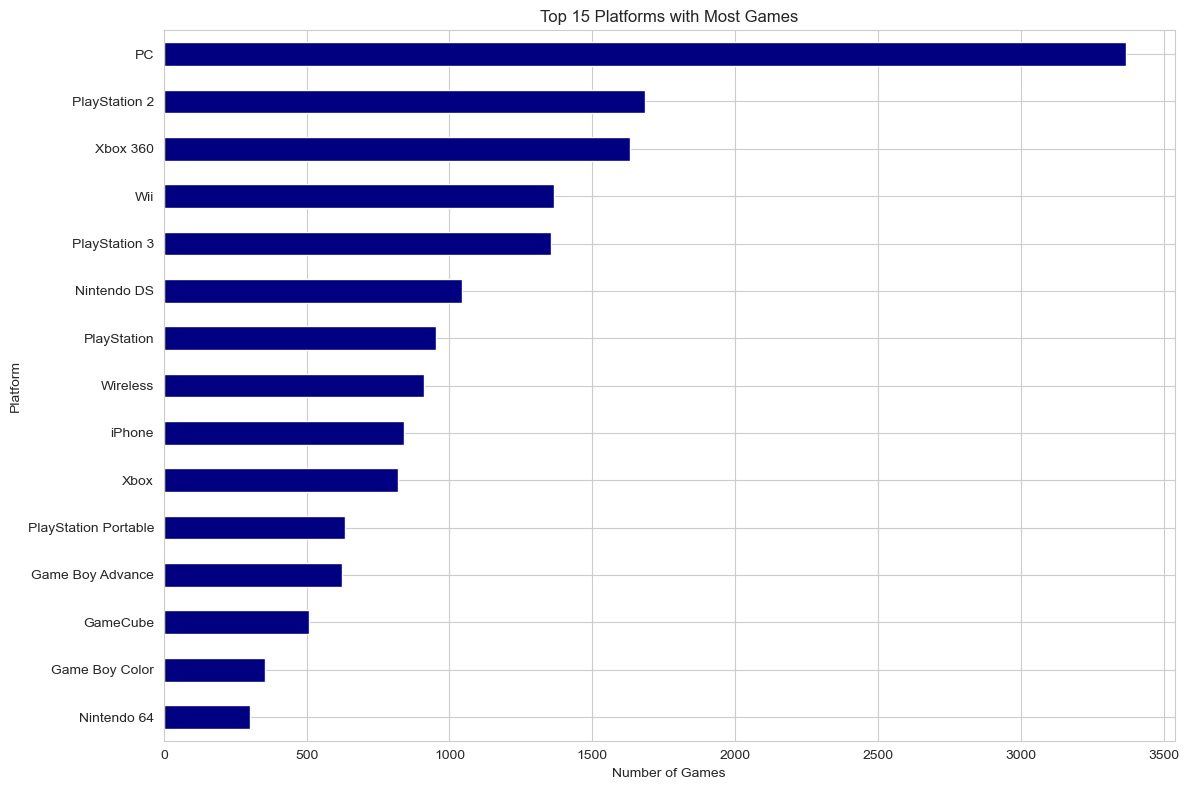

In [8]:
# Count the number of games for each platform
platform_counts = df["platform"].value_counts()

# Plot the top 15 platforms with the most games
plt.figure(figsize=(12, 8))
platform_counts.head(15).plot(kind="barh", color="navy")
plt.title("Top 15 Platforms with Most Games")
plt.xlabel("Number of Games")
plt.ylabel("Platform")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


- The PC platform has the highest number of games, making it the most represented platform in the dataset.
- PlayStation 2 (PS2) and Xbox 360 also have a significant number of games, showcasing their importance and popularity during their prime years.

# Console Analysis

## Platform with the higest average score

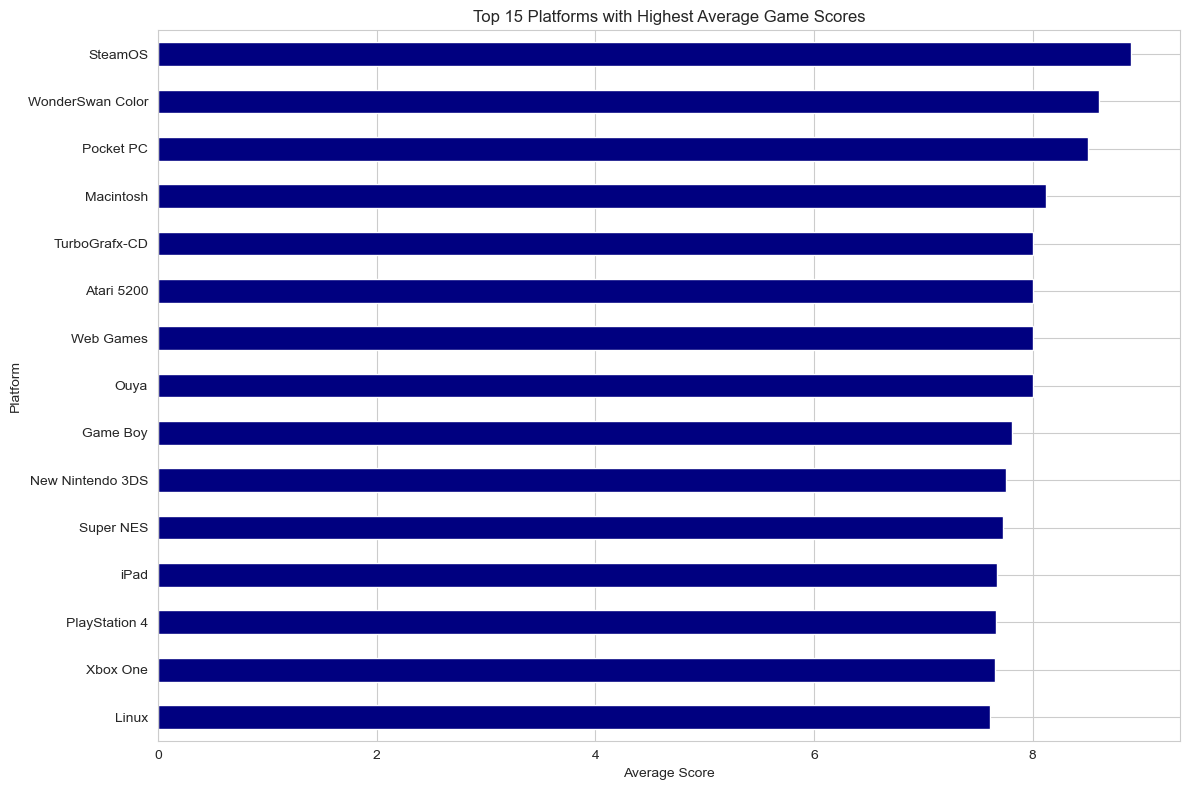

In [9]:
# Group the data by platform and calculate the average score for each platform
average_score_per_platform = df.groupby("platform")["score"].mean().sort_values(ascending=False)

# Plot the average game scores for the top 15 platforms
plt.figure(figsize=(12, 8))
average_score_per_platform.head(15).plot(kind="barh", color="navy")
plt.title("Top 15 Platforms with Highest Average Game Scores")
plt.xlabel("Average Score")
plt.ylabel("Platform")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


- SteamOS, WonderSwan, TurboGrafx-16, and a few others top the chart with high average scores. It"s noting that these platforms might have fewer games reviewed, which could affect the average.

## Platforms with the most Editor"s Choice games

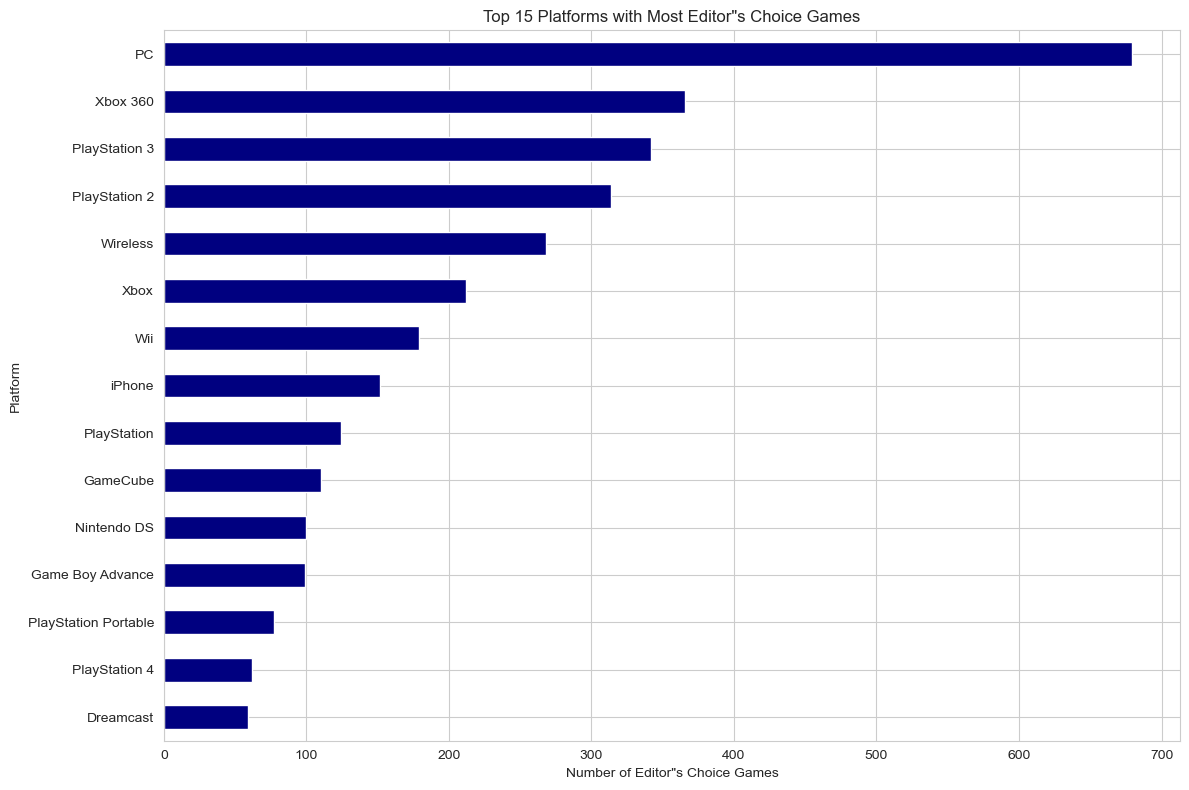

In [10]:
# Filter the data for games marked as "Editor"s Choice"
editors_choice_data = df[df["editors_choice"] == "Y"]

# Count the number of Editor"s Choice games for each platform
editors_choice_counts = editors_choice_data["platform"].value_counts()

# Plot the top 15 platforms with the most Editor"s Choice games
plt.figure(figsize=(12, 8))
editors_choice_counts.head(15).plot(kind="barh", color="navy")
plt.title("Top 15 Platforms with Most Editor\"s Choice Games")
plt.xlabel("Number of Editor\"s Choice Games")
plt.ylabel("Platform")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


- There are no supprise, PC sits on the top of the chard
- Xbox 360 and Play Stationn 3 follow closely, suggesting a consistent quality and preference for games on these platforms.

# Genre Analysis

## Genre with highest average game score

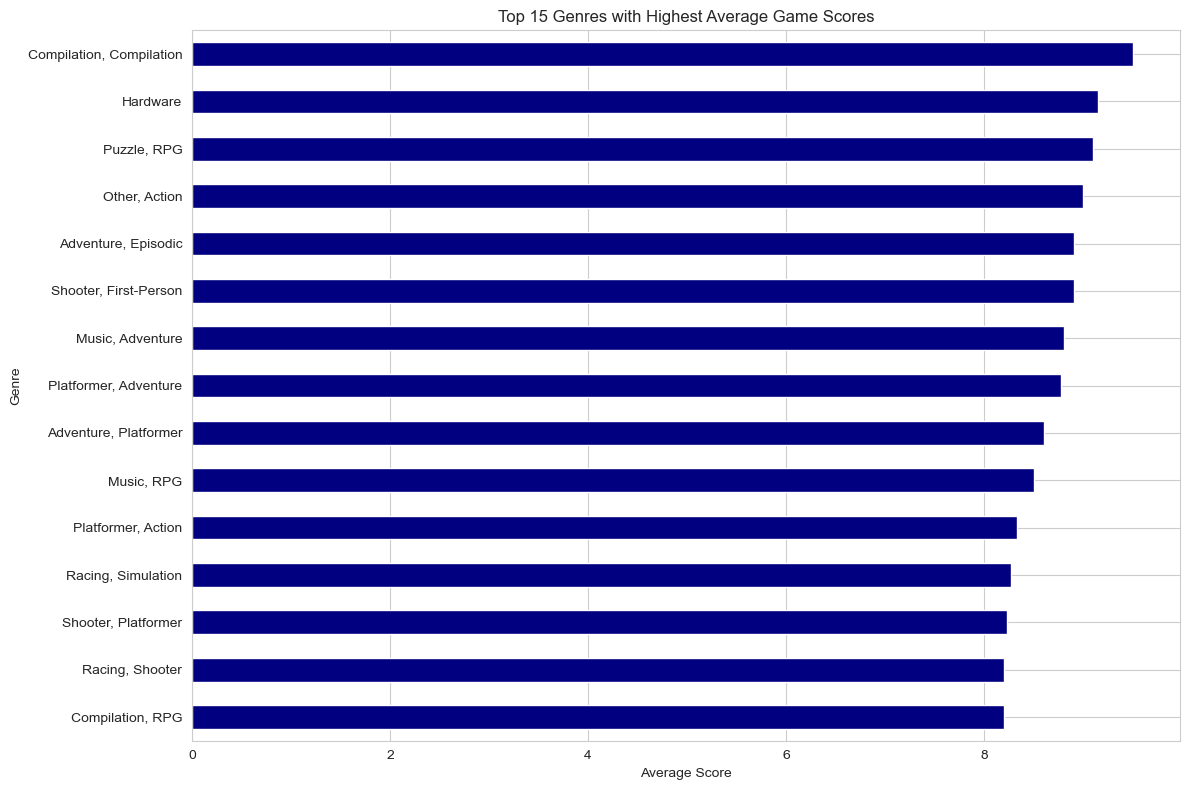

In [11]:
# Group the data by genre and calculate the average score for each genre
average_score_per_genre = df.groupby("genre")["score"].mean().sort_values(ascending=False)

# Plot the average game scores for the top 15 genres
plt.figure(figsize=(12, 8))
average_score_per_genre.head(15).plot(kind="barh", color="navy")
plt.title("Top 15 Genres with Highest Average Game Scores")
plt.xlabel("Average Score")
plt.ylabel("Genre")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


- Some niche or specific genres like Compilation, Flight, Hardware, and Music have high average scores. Nevetheless, t his might be due to fewer games in these genres, which can affect the average.

## Genre with the most Editor"s Choice games

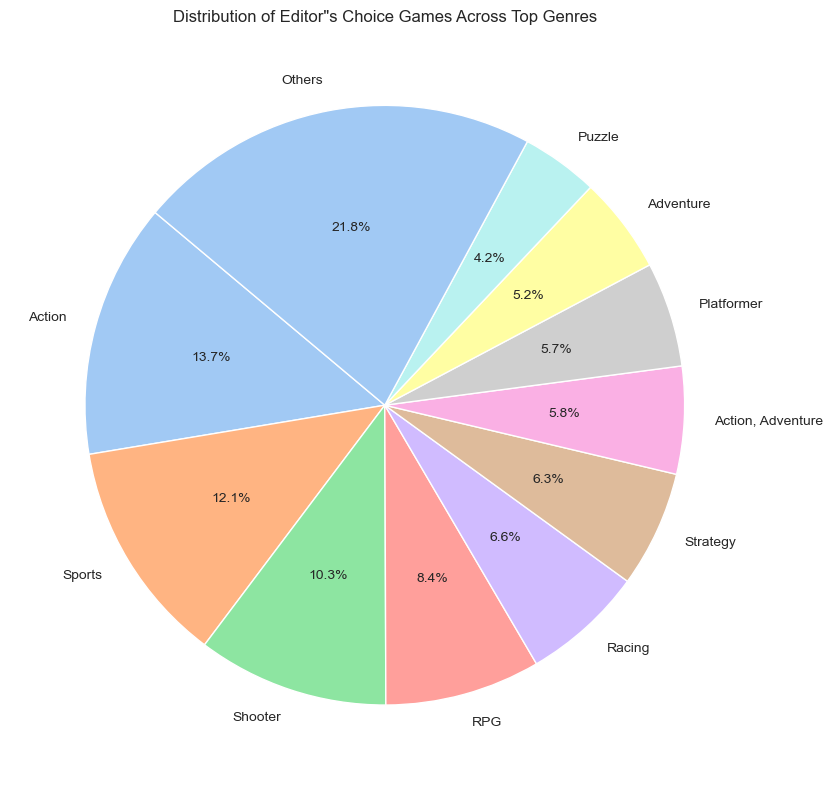

In [12]:
# Count the number of Editor"s Choice games for each genre
editors_choice_genre_counts = editors_choice_data["genre"].value_counts()

# Select the top 10 genres and group the remaining into "Others"
top_genres = editors_choice_genre_counts.head(10)
top_genres["Others"] = editors_choice_genre_counts[10:].sum()

# Plot the distribution of Editor"s Choice games across the top genres using a pie chart
plt.figure(figsize=(12, 8))
top_genres.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel", len(top_genres)))
plt.title("Distribution of Editor\"s Choice Games Across Top Genres")
plt.ylabel("")  
plt.tight_layout()
plt.show()


- Action stands out as the dominant genre, making up a significant portion of the "Editor"s Choice" games.
- Other genres such as Sports, Shooter, Adventure, and RPG also have a notable presence among the favorites of editors.

# Trends 



## Trends in Game Scores Over Time for Top Genres

In [13]:
# Identify the top 5 most popular genres based on the number of games
top_5_genres = df["genre"].value_counts().head(5).index

print(f" Top five most popular genres based on the number of games are: {top_5_genres.values}")


 Top five most popular genres based on the number of games are: ['Action' 'Sports' 'Shooter' 'Racing' 'Adventure']


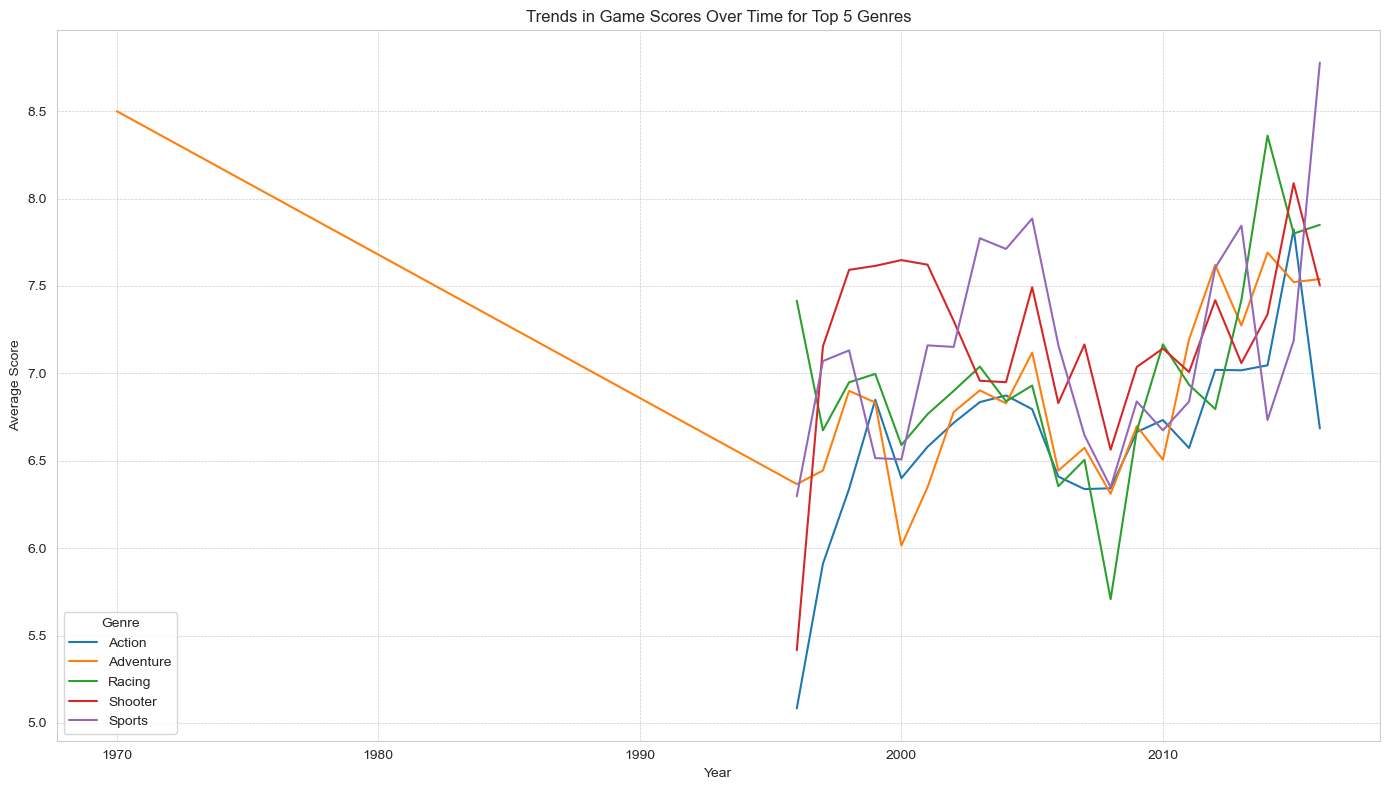

In [14]:
# Group by release year and genre, then calculate the average score for each genre over the years
genre_score_trends = df[df["genre"].isin(top_5_genres)].groupby(["release_year", "genre"])["score"].mean().unstack()

# Plot the trends in game scores over time for the top 5 genres
plt.figure(figsize=(14, 8))
genre_score_trends.plot(ax=plt.gca())
plt.title("Trends in Game Scores Over Time for Top 5 Genres")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.legend(title="Genre")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


- Action: The average score for action games seems to have some fluctuations but remains relatively stable overall.
- Sports: There"s a noticeable upward trend from the early 2000s, stabilizing in the later years.
- Shooter: This genre appears to have some variability but remains relatively consistent in the later years.
- Racing: The racing genre has an upward trend from the mid-1990s to the mid-2000s, after which it remains relatively stable.
- Adventure: There"s noticeable variability in the scores, but the genre seems to stabilize in the later years.

## Trends in Game Releases for Top Platforms.

In [15]:
# Identify the top 5 platforms based on the number of game releases
top_5_platforms = df["platform"].value_counts().head(5).index

print(f" Top five most popular platforms based on the number of games are: {top_5_platforms.values}")

 Top five most popular platforms based on the number of games are: ['PC' 'PlayStation 2' 'Xbox 360' 'Wii' 'PlayStation 3']


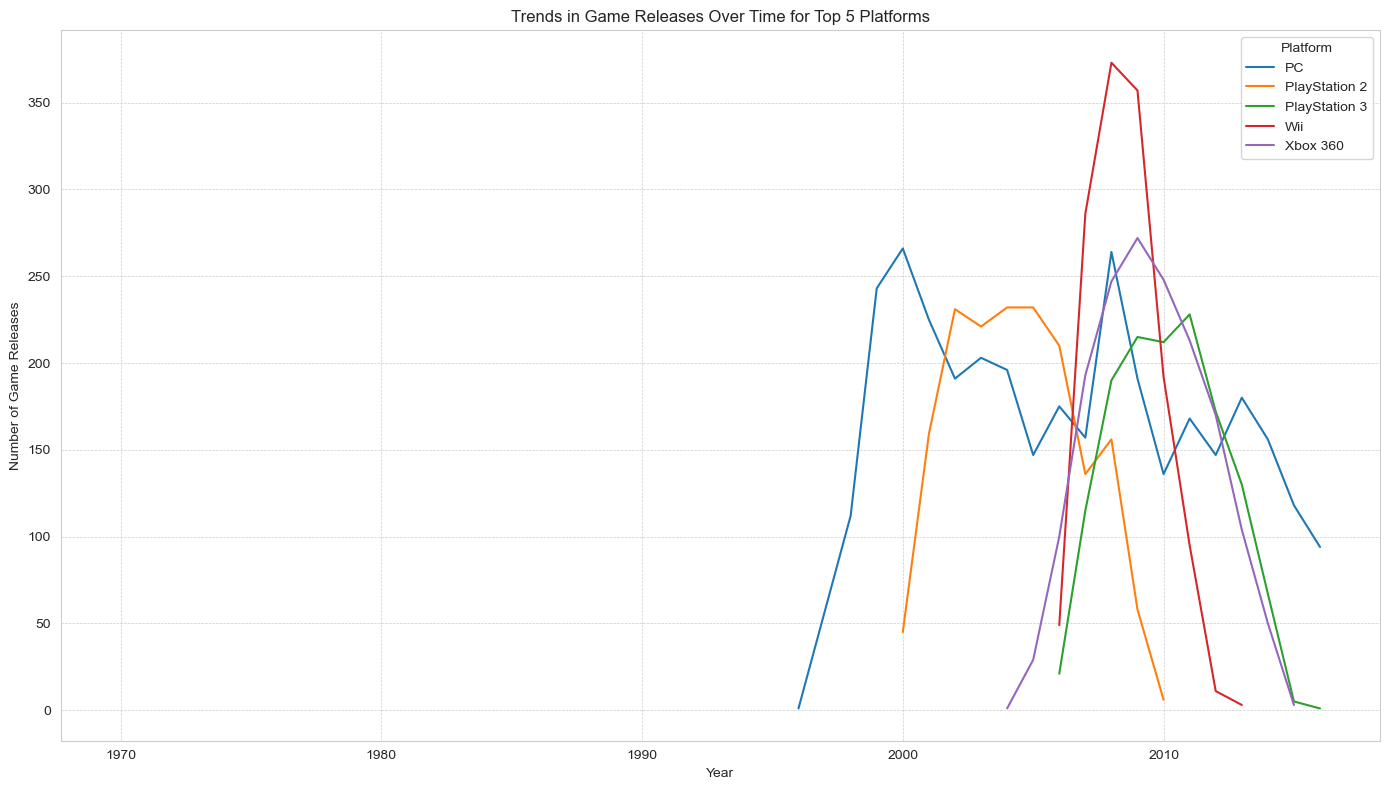

In [16]:
# Group by release year and platform, then count the number of game releases for each platform over the years
platform_release_trends = df[df["platform"].isin(top_5_platforms)].groupby(["release_year", "platform"]).size().unstack()

# Plot the trends in game releases over time for the top 5 platforms
plt.figure(figsize=(14, 8))
platform_release_trends.plot(ax=plt.gca())
plt.title("Trends in Game Releases Over Time for Top 5 Platforms")
plt.xlabel("Year")
plt.ylabel("Number of Game Releases")
plt.legend(title="Platform")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


- PC: The number of game releases for the PC platform shows an upward trend from the late 1990s, peaking around 2008, and then sees a decline.
- PlayStation 2 (PS2): There"s a rise in game releases from the early 2000s, peaking in the mid-2000s, followed by a decline as newer platforms emerged.
- Xbox 360: The trend for Xbox 360 shows a steady increase from its launch, peaking around 2008, and then a gradual decline.
- Wii: The Wii platform saw a rise in game releases after its launch, reaching a peak around 2009, followed by a decline.
- PlayStation 3 (PS3): The trend for PS3 is similar to the Xbox 360, with a rise post-launch, a peak, and then a decline.

# Key Insight

- General Game Ratings: Most games receive average to above-average ratings, with scores predominantly between 6 and 8.
- Trends Over Time: There was a noticeable increase in game releases from the late 1990s, peaking around 2008-2009. Despite the growing number of releases, average game scores remained relatively stable.
- Platform Analysis: PC is the most represented platform in terms of game releases, followed by PlayStation 2, Xbox 360, Wii, and PlayStation 3. 
- Genre Popularity: Action stands out as the most popular genre, followed by Sports, Shooter, Racing, and Adventure. These genres also tend to have high average scores and are frequently selected as "Editor"s Choice".